In [4]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde import KDE
# from kdelearn.kde_funcs import KDEOutliersDetector
from kdelearn.bandwidth_selection import normal_reference, direct_plugin
from sklearn.neighbors import NearestNeighbors

Przy

nasileniu szumu a=0.0, 0.1, 0.2, 0.3, 0.4, 0.5

siatce dla r=0.01, 0.02, ..., 0.5

siatce dla mnożnika h=0.2, 0.4, ..., 10.0

\newpage

# Siatka po r (przy k=10)

In [7]:
def func1(x_train):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = []
    r_list = []
    for r in np.arange(0.01, 0.51, 0.01):
        r = round(r, 3)

        # knn
        k = 11
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
        distances, indices = nbrs.kneighbors(x_train)
        dist_k = np.max(distances, axis=1)
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        dist_out = np.sort(dist_k[outliers])[:tmp]
        dist_in = np.sort(dist_k[inliers])[-tmp:]
        metrics = dist_in.sum() / dist_out.sum()

        metrics_list.append(metrics)
        r_list.append(r)

    plt.figure(figsize=(5, 3.5))
    plt.plot(r_list, metrics_list, "-o")
    plt.xlabel("r")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], r_list[idx])
    
    print(f"r - globalne minimum: {global_min[1]:.3f}, Wskaźnik: {global_min[0]:.3f}")
    print("-"*10)
    
    return global_min, scores

a = 0.0


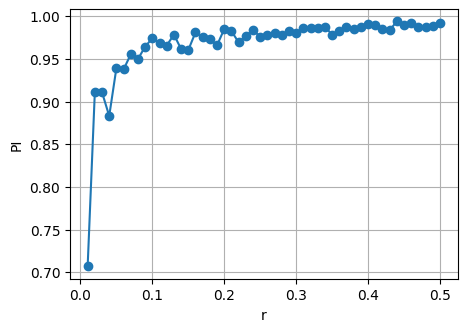

r - globalne minimum: 0.010, Wskaźnik: 0.707
----------


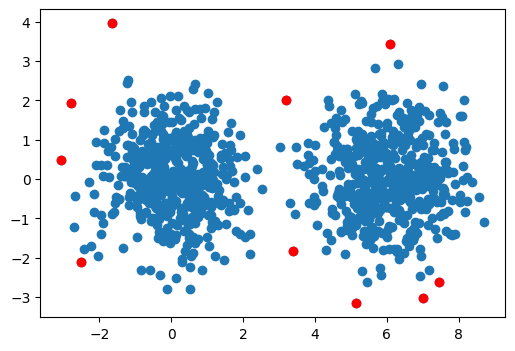

a = 0.1


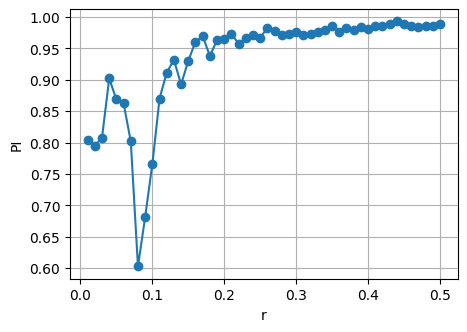

r - globalne minimum: 0.080, Wskaźnik: 0.603
----------


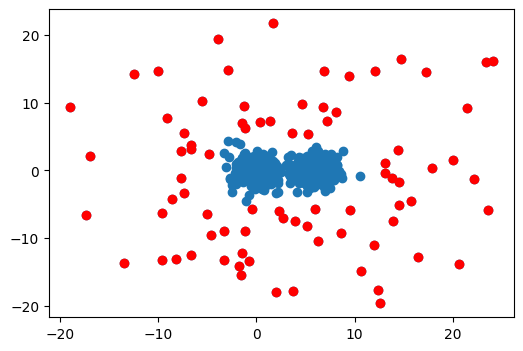

a = 0.2


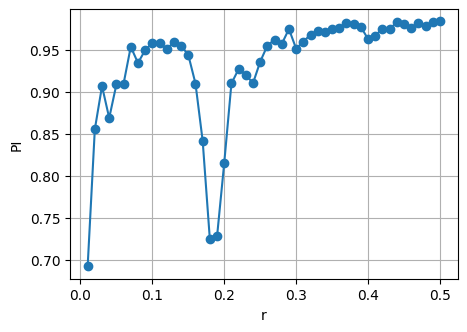

r - globalne minimum: 0.010, Wskaźnik: 0.692
----------


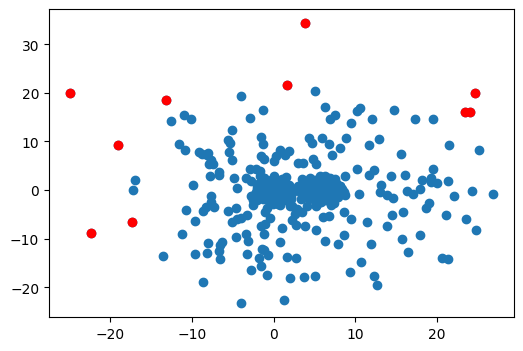

a = 0.3


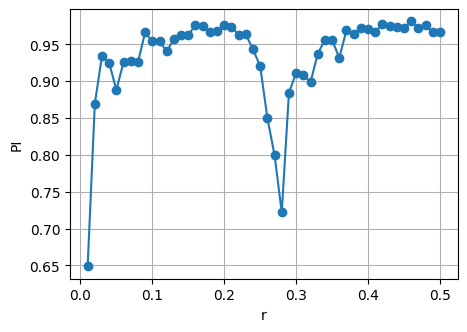

r - globalne minimum: 0.010, Wskaźnik: 0.648
----------


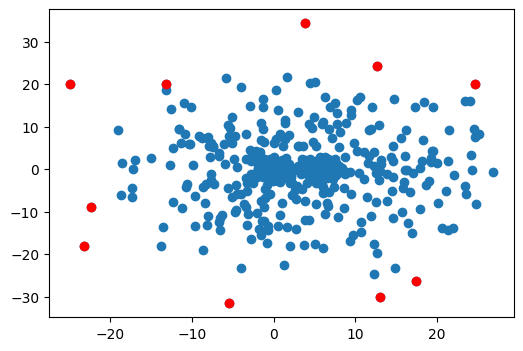

a = 0.4


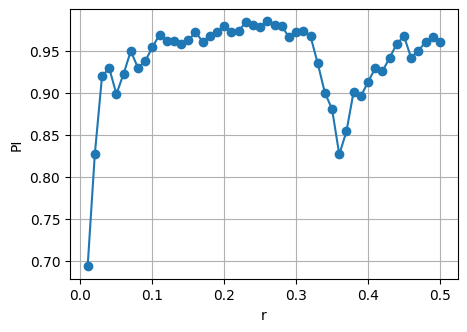

r - globalne minimum: 0.010, Wskaźnik: 0.694
----------


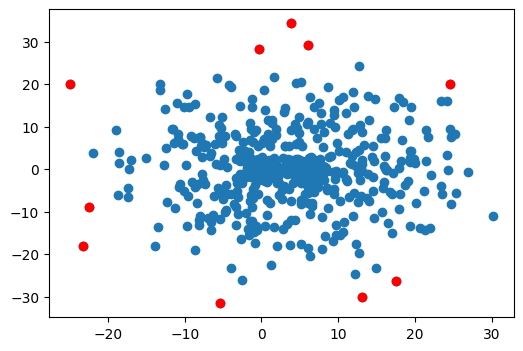

a = 0.5


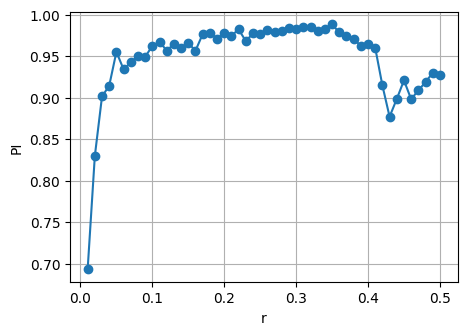

r - globalne minimum: 0.010, Wskaźnik: 0.693
----------


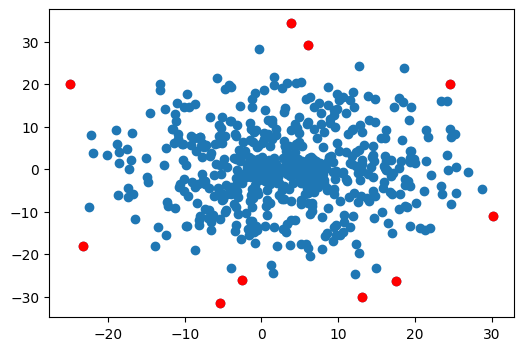

In [8]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))
    
    # Run
    global_min, scores = func1(x_train)
    
    plt.figure(figsize=(6, 4))
    k = 11
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - global_min[1])
    labels_pred = np.where(dist_k >= threshold, 1 ,0)
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
#     plt.xlim(-4, 10)
#     plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.01)

In [9]:
def func2(x_train, r):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = []
    k_list = []
    for k in [2, 3, 6, 11, 21, 51, 101]:
        
        # knn
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
        distances, indices = nbrs.kneighbors(x_train)
        dist_k = np.max(distances, axis=1)
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        inliers = labels_pred == 0
        outliers = labels_pred == 1
        n_outliers = (outliers == 1).sum()
        n_inliers = (outliers == 0).sum()
        tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
        dist_out = np.sort(dist_k[outliers])[:tmp]
        dist_in = np.sort(dist_k[inliers])[-tmp:]
        metrics = dist_in.sum() / dist_out.sum()

        metrics_list.append(metrics)
        k_list.append(k - 1)

    plt.figure(figsize=(5, 3.5))
    plt.plot(k_list, metrics_list, "-o")
    plt.xlabel("k")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], k_list[idx] + 1)
    
    print(f"Najlepsze k: {global_min[1]-1:.3f}, Wskaźnik: {global_min[0]:.3f}")
    print("-"*10)
    
    return global_min, scores

a = 0.0


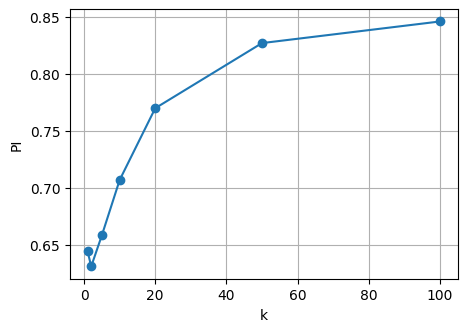

Najlepsze k: 2.000, Wskaźnik: 0.631
----------


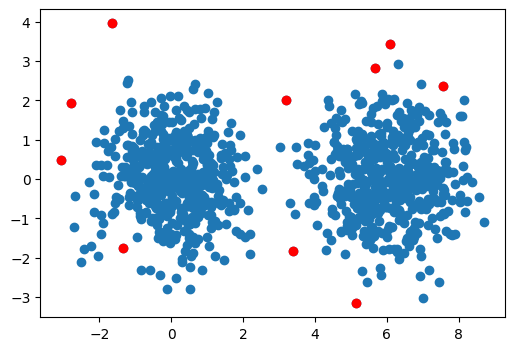

a = 0.1


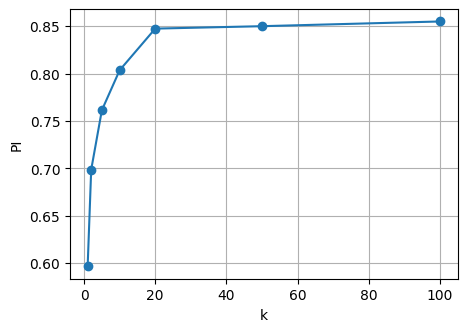

Najlepsze k: 1.000, Wskaźnik: 0.597
----------


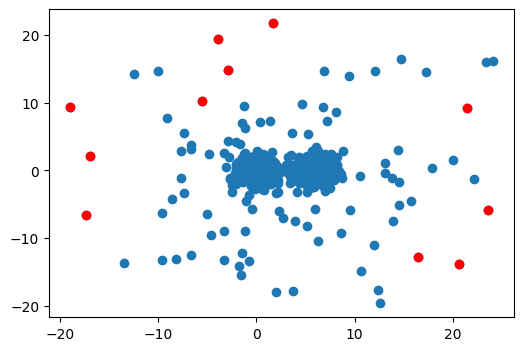

a = 0.2


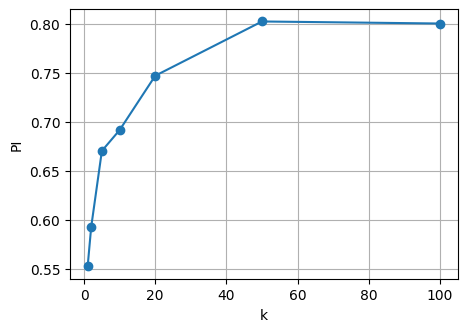

Najlepsze k: 1.000, Wskaźnik: 0.552
----------


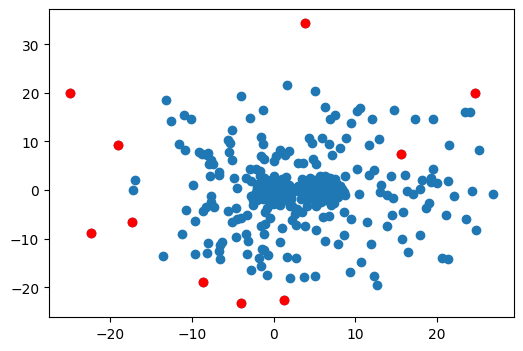

a = 0.3


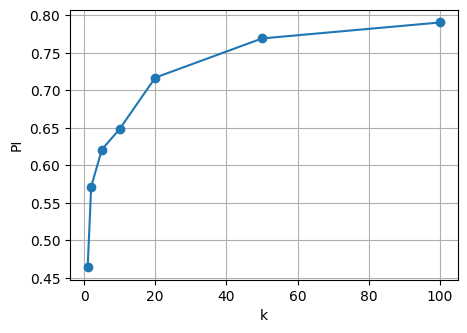

Najlepsze k: 1.000, Wskaźnik: 0.464
----------


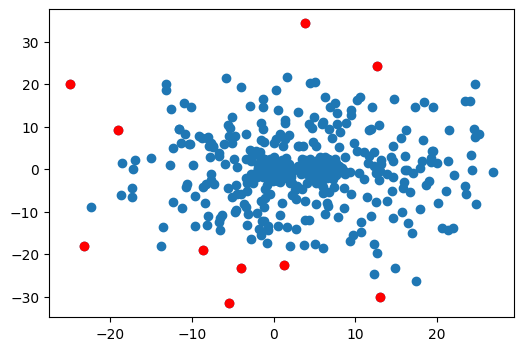

a = 0.4


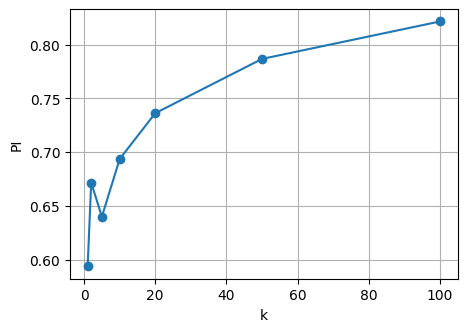

Najlepsze k: 1.000, Wskaźnik: 0.594
----------


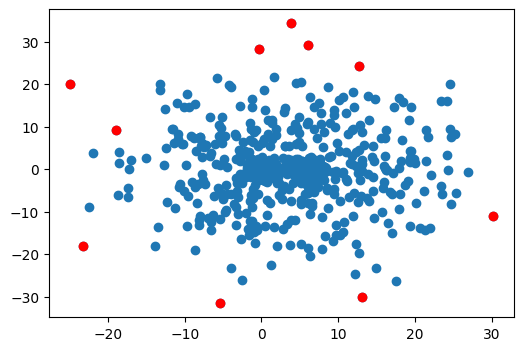

a = 0.5


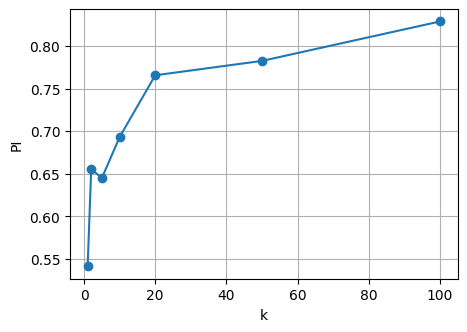

Najlepsze k: 1.000, Wskaźnik: 0.541
----------


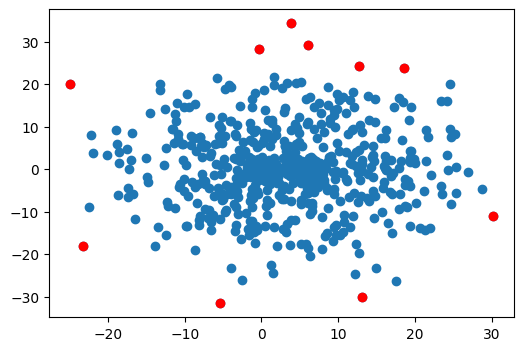

In [10]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.01
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.05)

a = 0.0


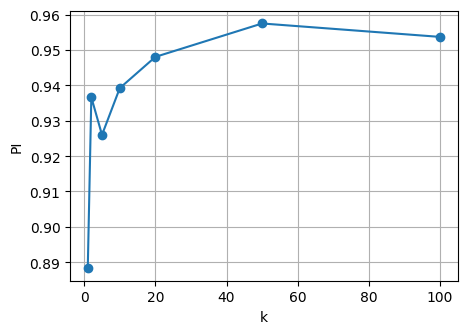

Najlepsze k: 1.000, Wskaźnik: 0.888
----------


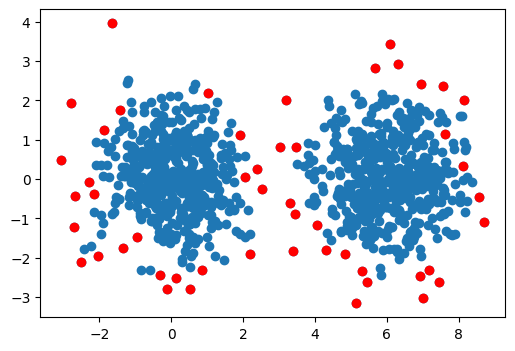

a = 0.1


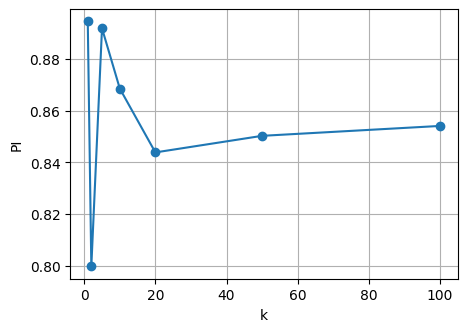

Najlepsze k: 2.000, Wskaźnik: 0.800
----------


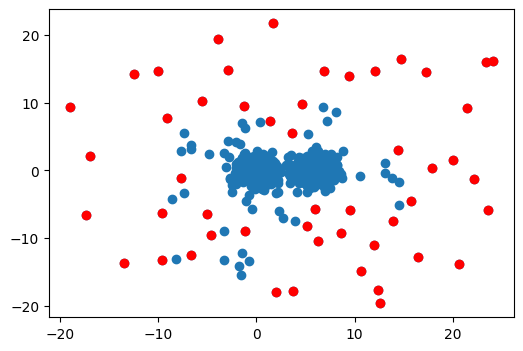

a = 0.2


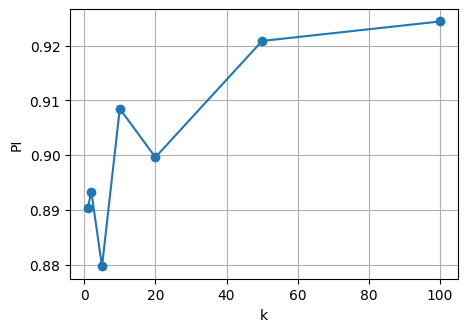

Najlepsze k: 5.000, Wskaźnik: 0.880
----------


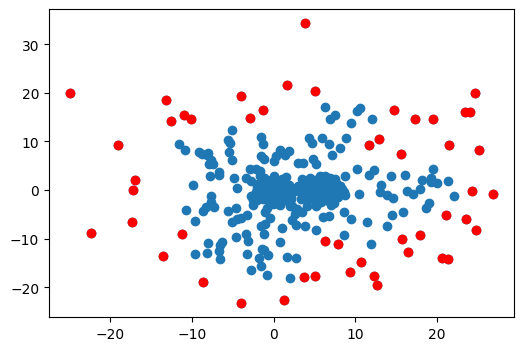

a = 0.3


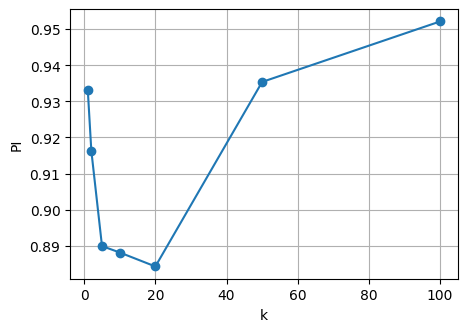

Najlepsze k: 20.000, Wskaźnik: 0.884
----------


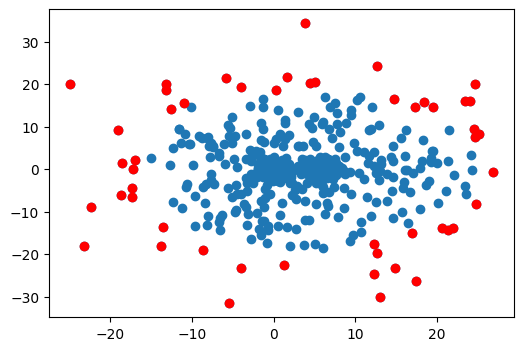

a = 0.4


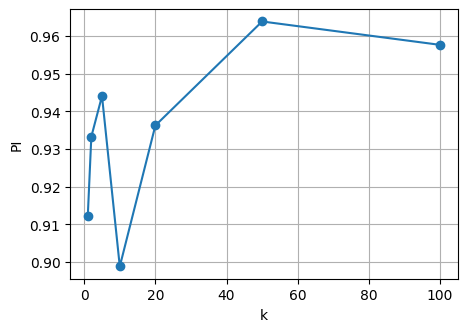

Najlepsze k: 10.000, Wskaźnik: 0.899
----------


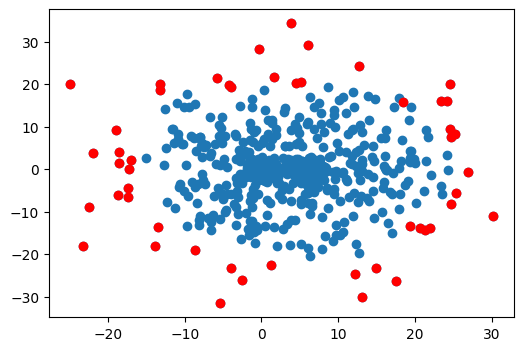

a = 0.5


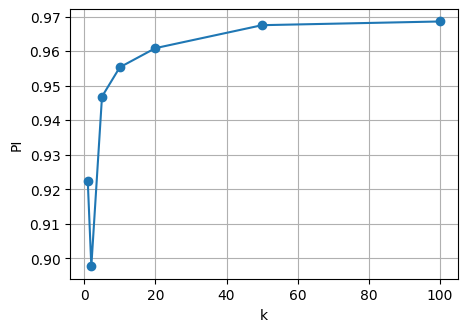

Najlepsze k: 2.000, Wskaźnik: 0.898
----------


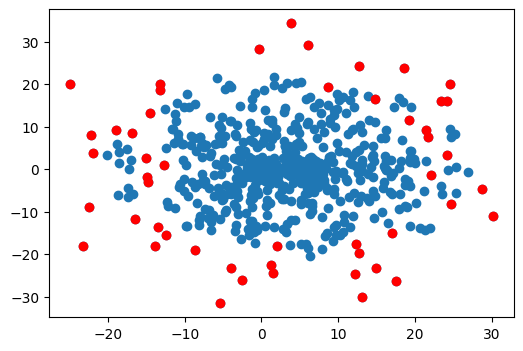

In [11]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.05
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.1)

a = 0.0


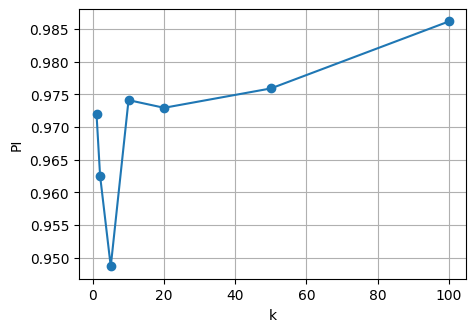

Najlepsze k: 5.000, Wskaźnik: 0.949
----------


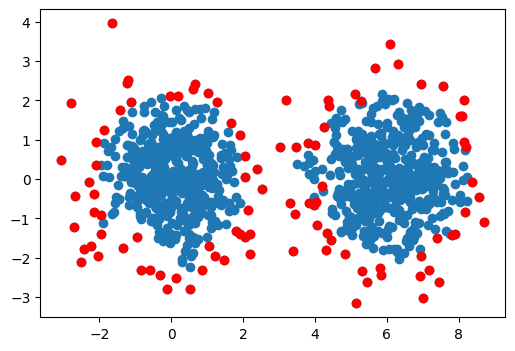

a = 0.1


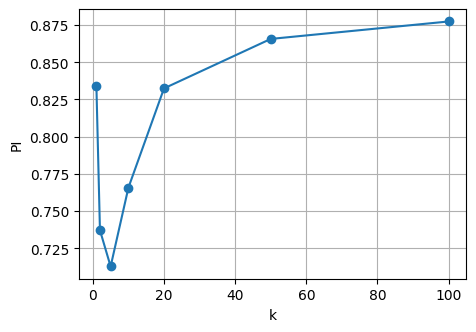

Najlepsze k: 5.000, Wskaźnik: 0.713
----------


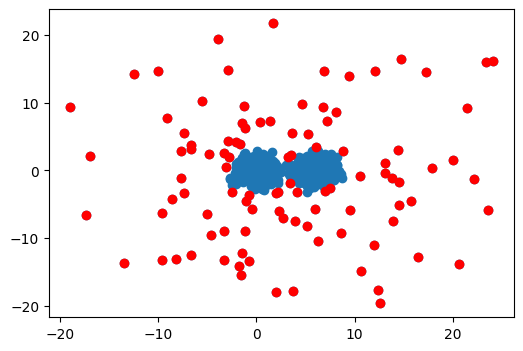

a = 0.2


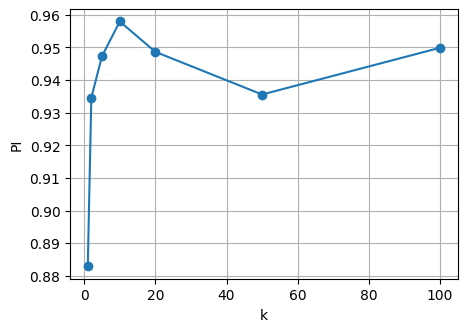

Najlepsze k: 1.000, Wskaźnik: 0.883
----------


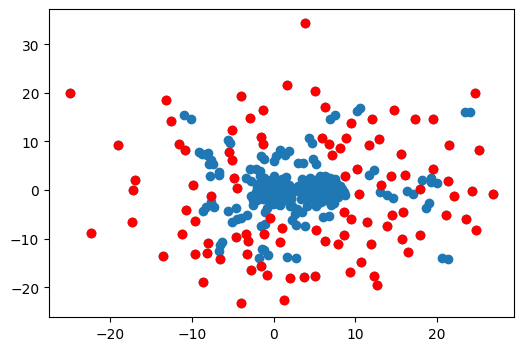

a = 0.3


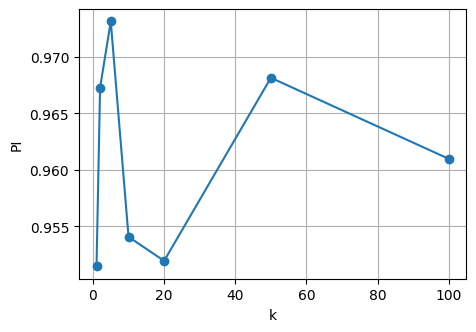

Najlepsze k: 1.000, Wskaźnik: 0.951
----------


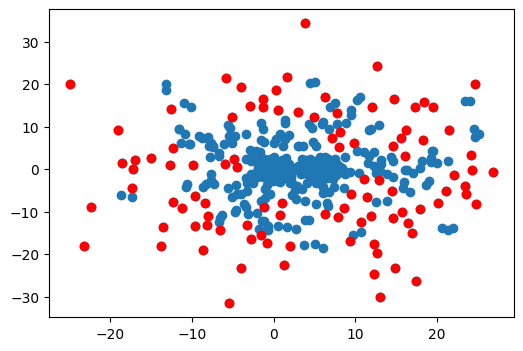

a = 0.4


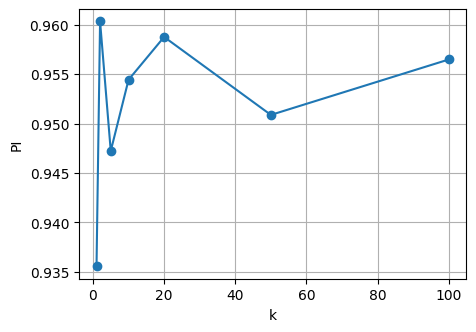

Najlepsze k: 1.000, Wskaźnik: 0.936
----------


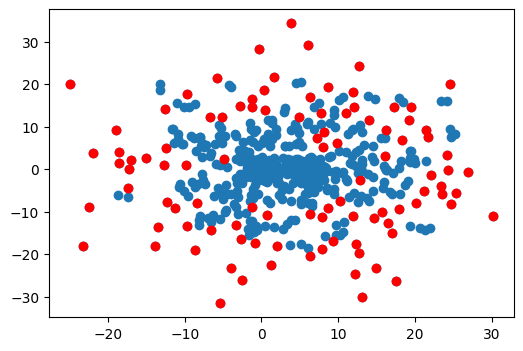

a = 0.5


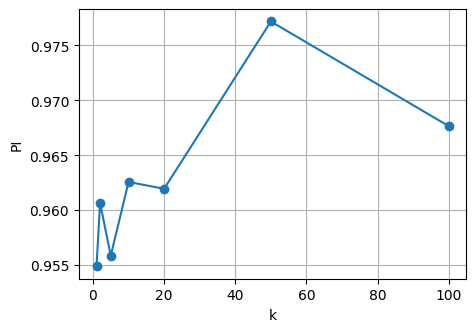

Najlepsze k: 1.000, Wskaźnik: 0.955
----------


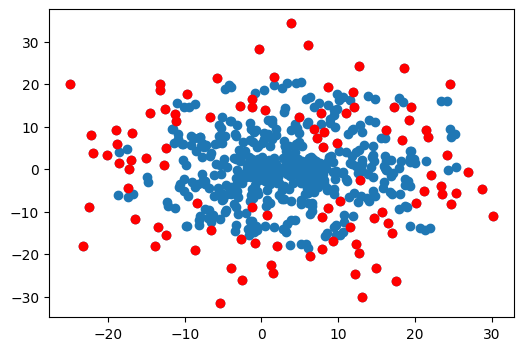

In [12]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.1
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.15)

a = 0.0


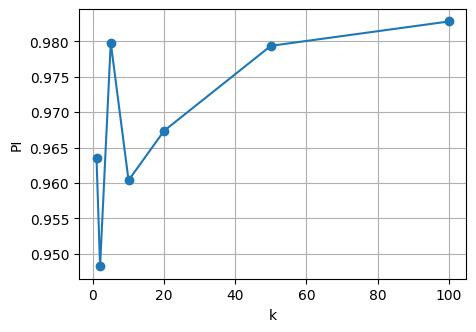

Najlepsze k: 2.000, Wskaźnik: 0.948
----------


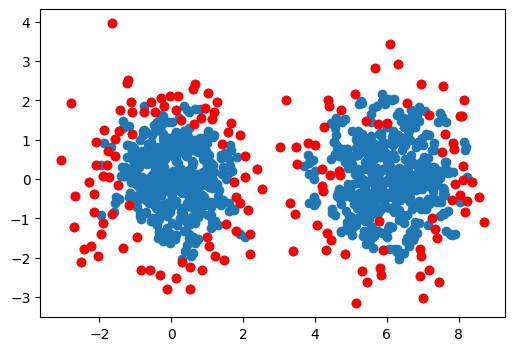

a = 0.1


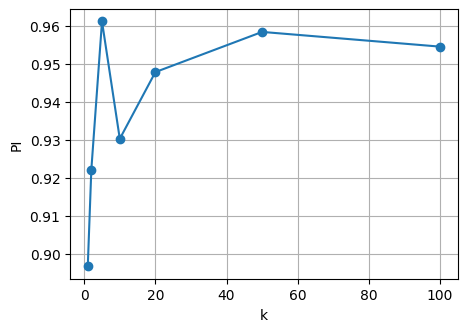

Najlepsze k: 1.000, Wskaźnik: 0.897
----------


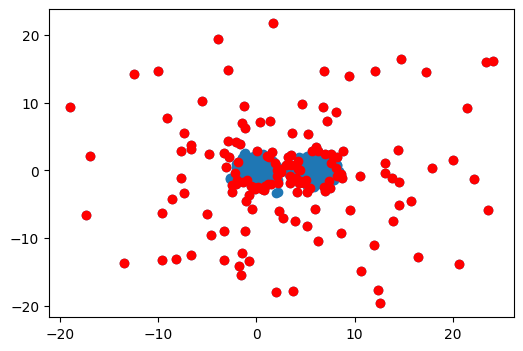

a = 0.2


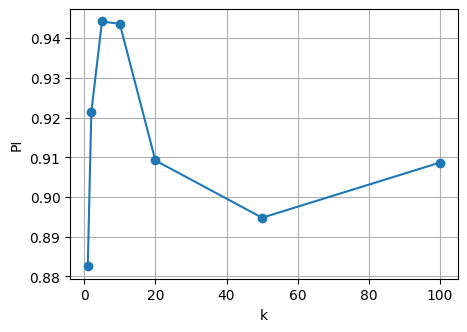

Najlepsze k: 1.000, Wskaźnik: 0.883
----------


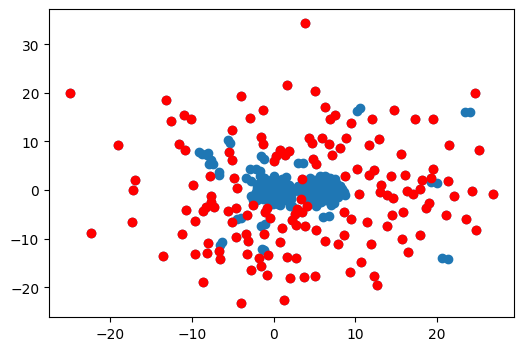

a = 0.3


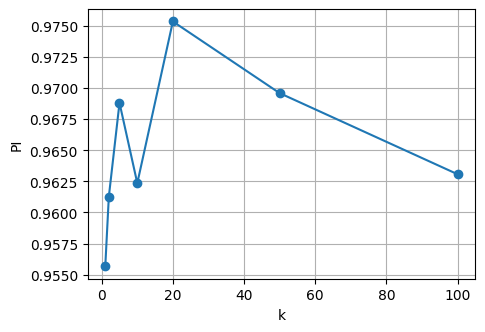

Najlepsze k: 1.000, Wskaźnik: 0.956
----------


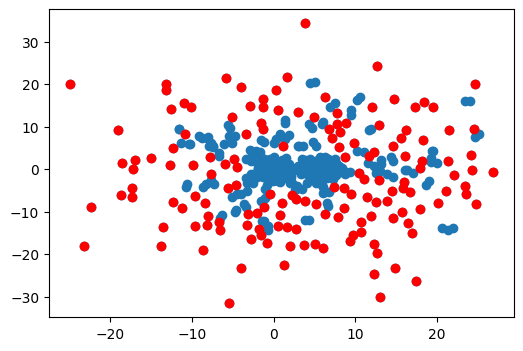

a = 0.4


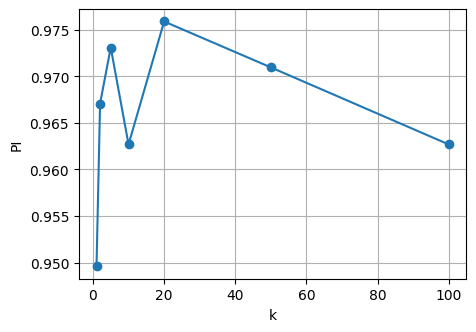

Najlepsze k: 1.000, Wskaźnik: 0.950
----------


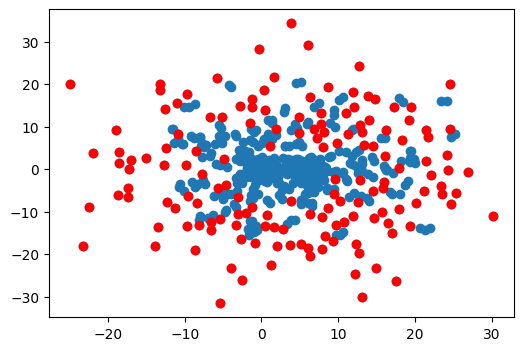

a = 0.5


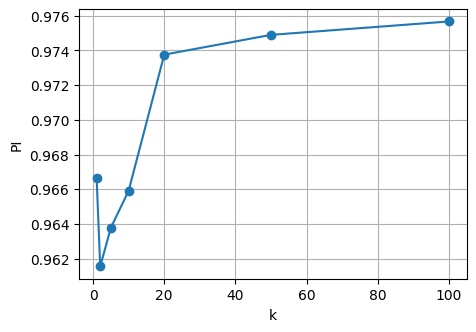

Najlepsze k: 2.000, Wskaźnik: 0.962
----------


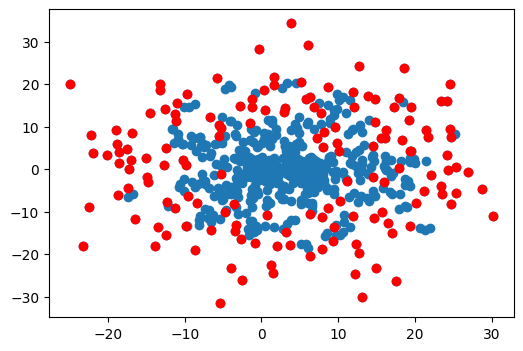

In [13]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.15
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.2)

a = 0.0


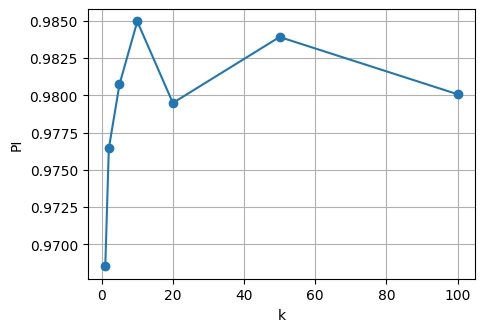

Najlepsze k: 1.000, Wskaźnik: 0.969
----------


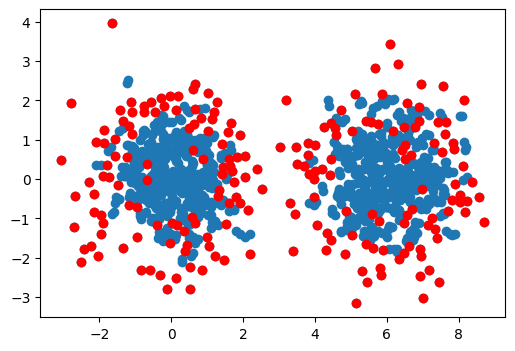

a = 0.1


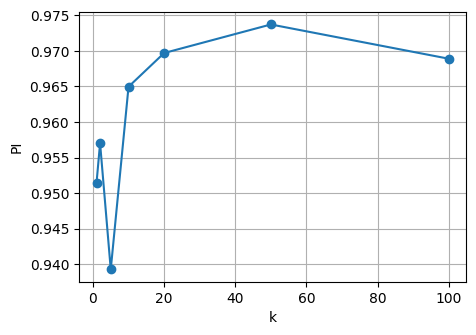

Najlepsze k: 5.000, Wskaźnik: 0.939
----------


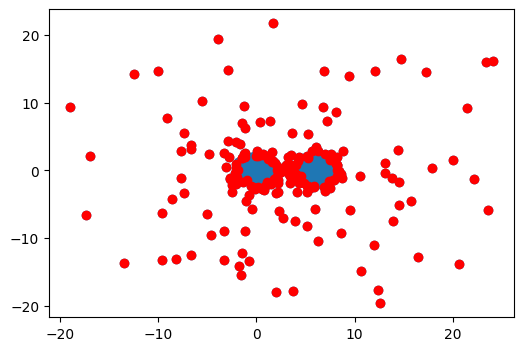

a = 0.2


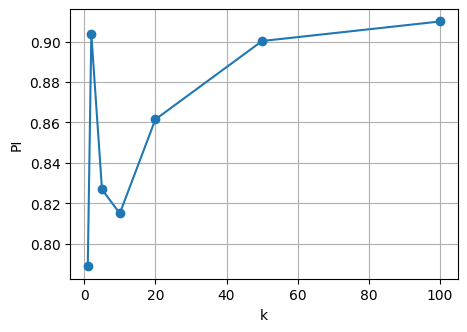

Najlepsze k: 1.000, Wskaźnik: 0.789
----------


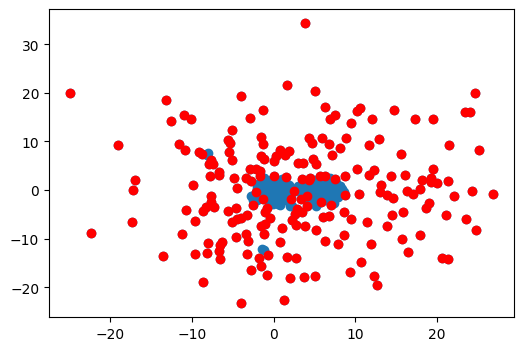

a = 0.3


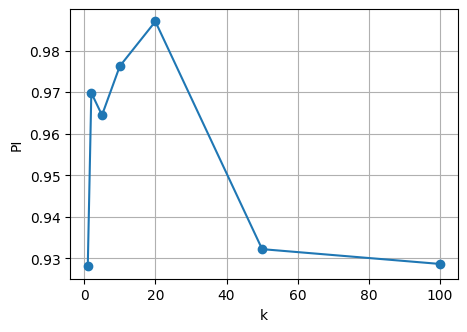

Najlepsze k: 1.000, Wskaźnik: 0.928
----------


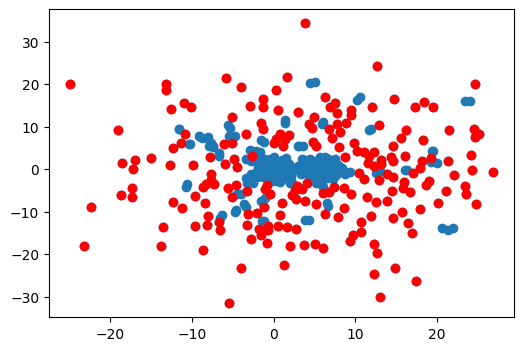

a = 0.4


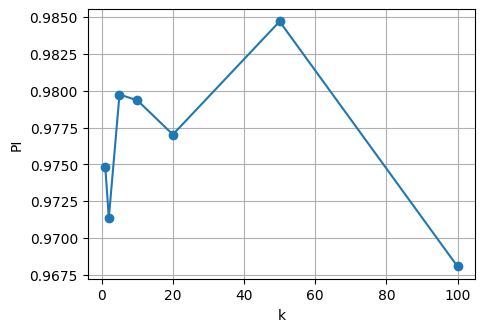

Najlepsze k: 100.000, Wskaźnik: 0.968
----------


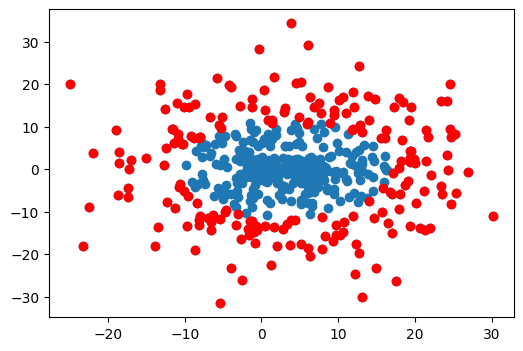

a = 0.5


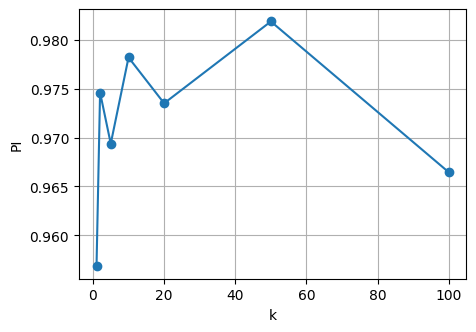

Najlepsze k: 1.000, Wskaźnik: 0.957
----------


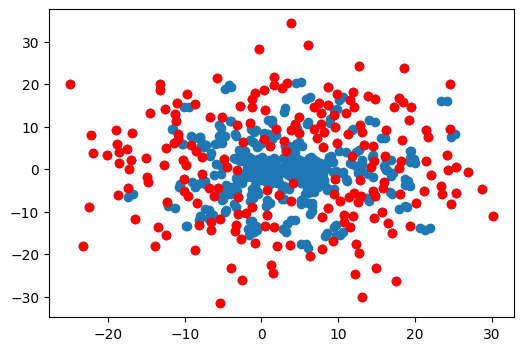

In [14]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.2
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.25)

a = 0.0


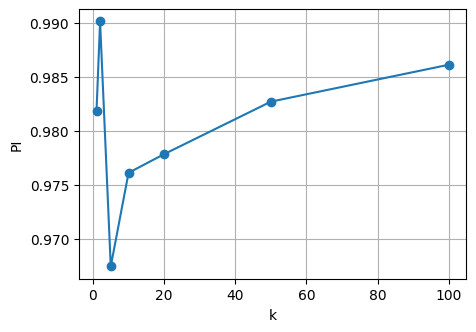

Najlepsze k: 5.000, Wskaźnik: 0.967
----------


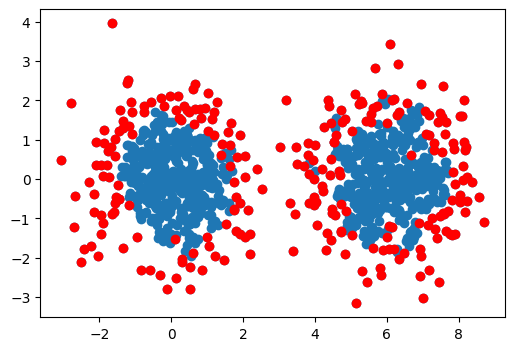

a = 0.1


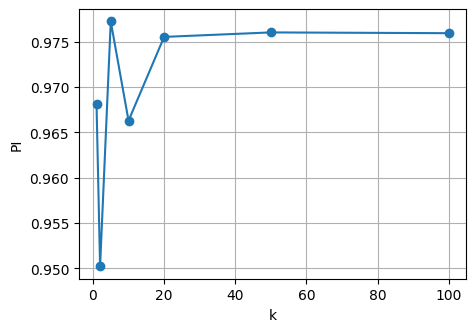

Najlepsze k: 2.000, Wskaźnik: 0.950
----------


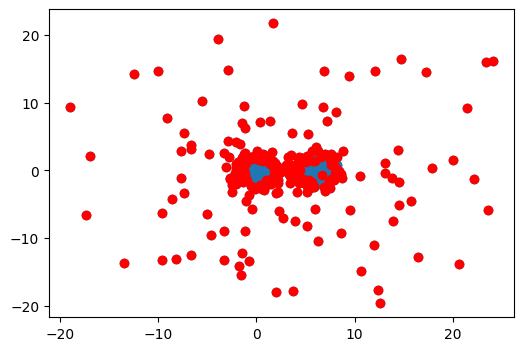

a = 0.2


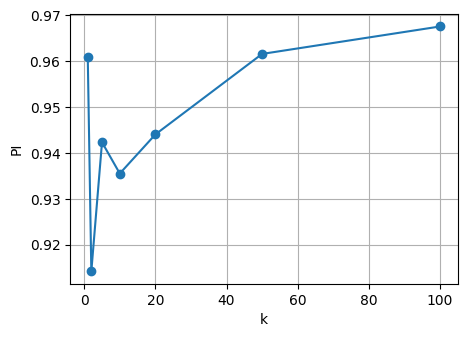

Najlepsze k: 2.000, Wskaźnik: 0.914
----------


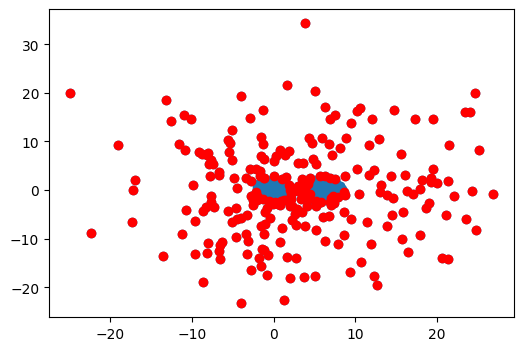

a = 0.3


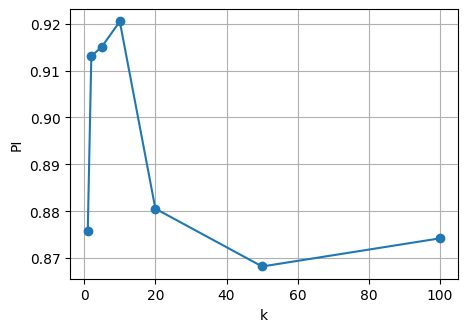

Najlepsze k: 50.000, Wskaźnik: 0.868
----------


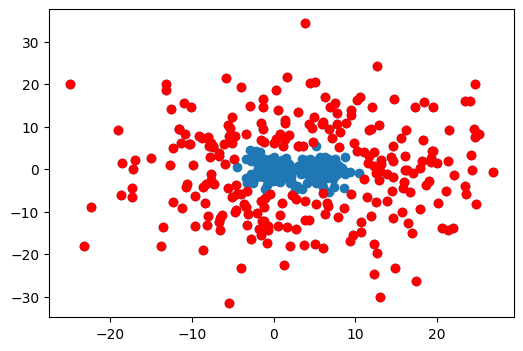

a = 0.4


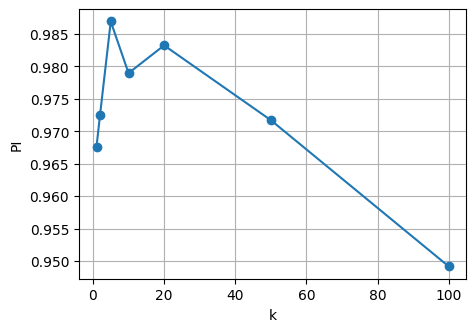

Najlepsze k: 100.000, Wskaźnik: 0.949
----------


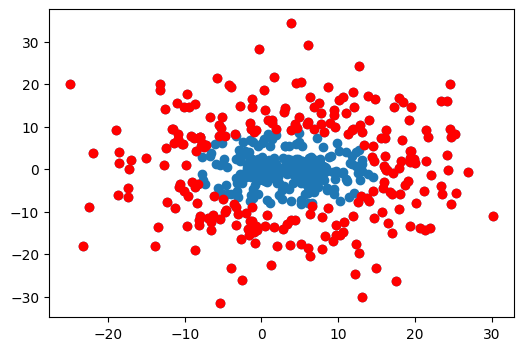

a = 0.5


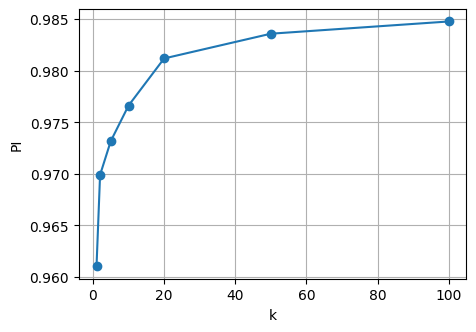

Najlepsze k: 1.000, Wskaźnik: 0.961
----------


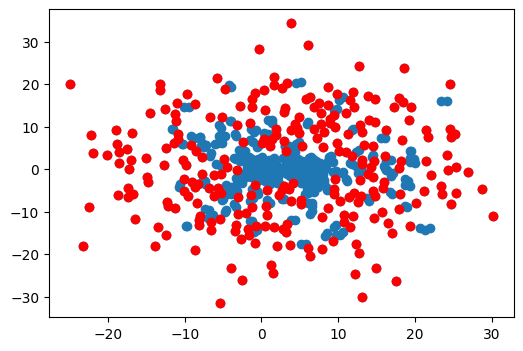

In [15]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.25
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po k (przy r=0.3)

a = 0.0


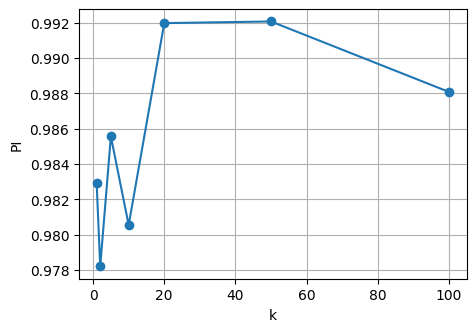

Najlepsze k: 2.000, Wskaźnik: 0.978
----------


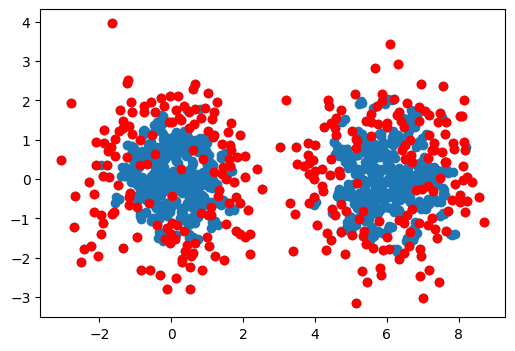

a = 0.1


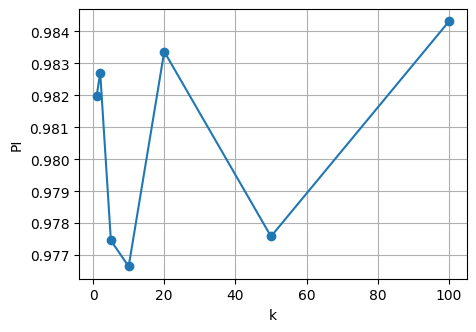

Najlepsze k: 10.000, Wskaźnik: 0.977
----------


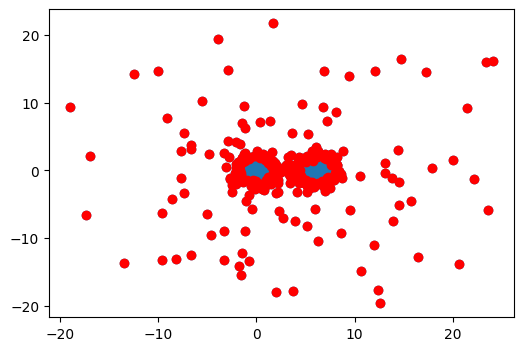

a = 0.2


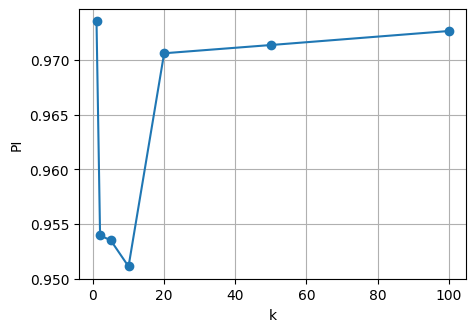

Najlepsze k: 10.000, Wskaźnik: 0.951
----------


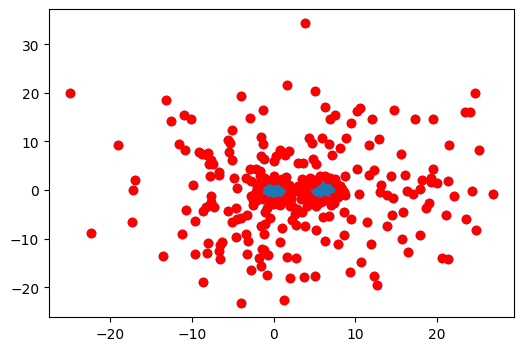

a = 0.3


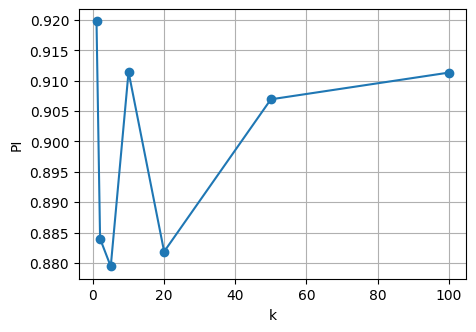

Najlepsze k: 5.000, Wskaźnik: 0.879
----------


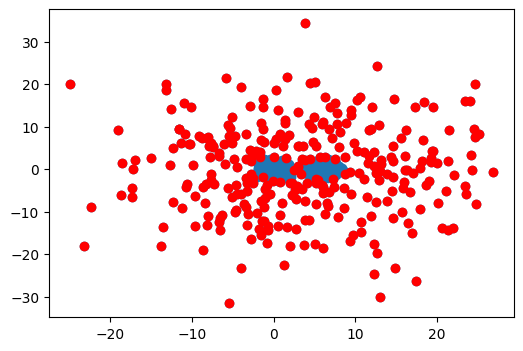

a = 0.4


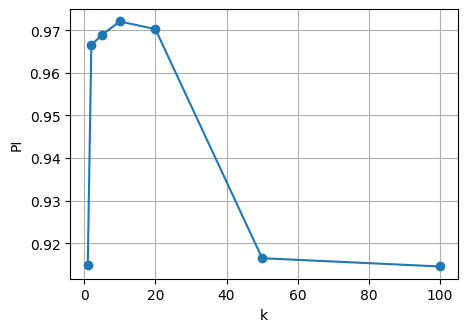

Najlepsze k: 100.000, Wskaźnik: 0.915
----------


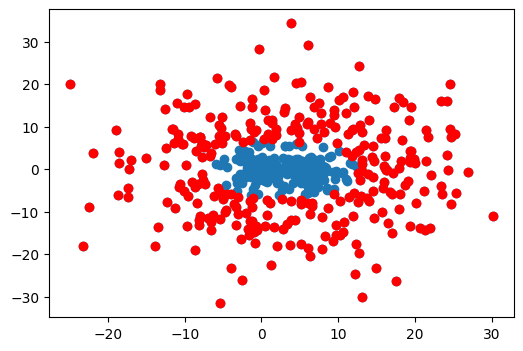

a = 0.5


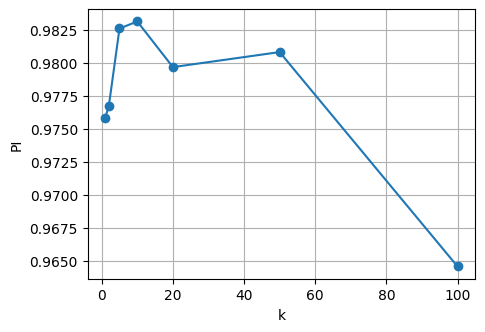

Najlepsze k: 100.000, Wskaźnik: 0.965
----------


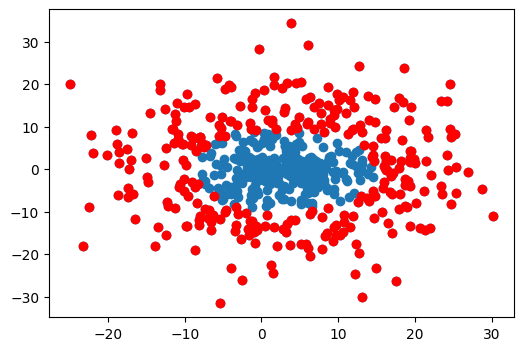

In [16]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.3
    global_min, _ = func2(x_train, r)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka dwuwymiarowa po r i k

In [19]:
def func3(x_train):
    bandwidth = direct_plugin(x_train, stage=2)

    metrics_list = []
    k_list = []
    r_list = []
    for k in [2, 3, 6, 11, 21, 51, 101]:
        
        for r in np.arange(0.01, 0.51, 0.01):
            r = round(r, 3)
        
            # knn
            nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
            distances, indices = nbrs.kneighbors(x_train)
            dist_k = np.max(distances, axis=1)
            threshold = np.quantile(dist_k, 1 - r)
            labels_pred = np.where(dist_k >= threshold, 1 ,0)

            n_outliers = labels_pred.sum()
            if n_outliers == 0:
                continue

            inliers = labels_pred == 0
            outliers = labels_pred == 1
            n_outliers = (outliers == 1).sum()
            n_inliers = (outliers == 0).sum()
            tmp = int(np.ceil(0.01 * (n_inliers + n_outliers)))
            dist_out = np.sort(dist_k[outliers])[:tmp]
            dist_in = np.sort(dist_k[inliers])[-tmp:]
            metrics = dist_in.sum() / dist_out.sum()

            metrics_list.append(metrics)
            k_list.append(k-1)
            r_list.append(r)

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], k_list[idx] + 1, r_list[idx])
    
    print(f"Najlepsze k: {global_min[1] - 1:.3f}, r: {global_min[2]}, Wskaźnik: {global_min[0]:.3f}")
    
    return global_min, scores

a = 0.0
Najlepsze k: 2.000, r: 0.01, Wskaźnik: 0.631


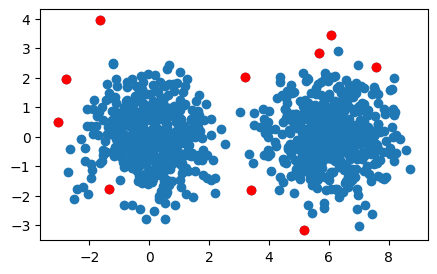

--------------------
a = 0.1
Najlepsze k: 1.000, r: 0.01, Wskaźnik: 0.597


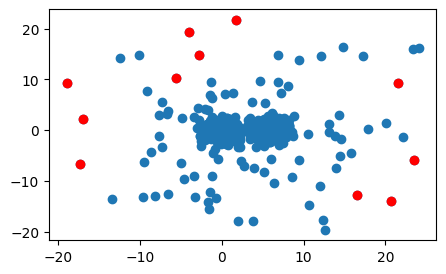

--------------------
a = 0.2
Najlepsze k: 1.000, r: 0.01, Wskaźnik: 0.552


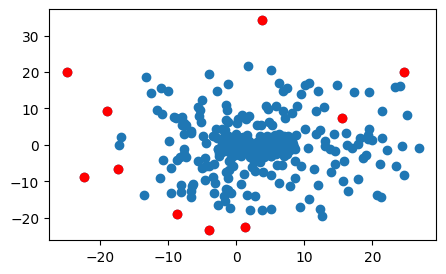

--------------------
a = 0.3
Najlepsze k: 1.000, r: 0.01, Wskaźnik: 0.464


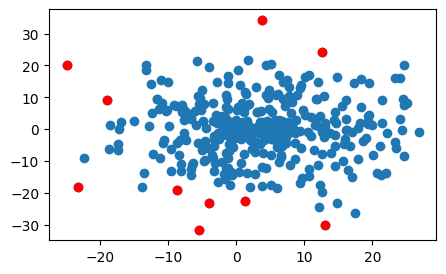

--------------------
a = 0.4
Najlepsze k: 1.000, r: 0.01, Wskaźnik: 0.594


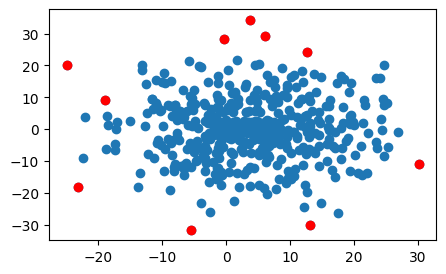

--------------------
a = 0.5
Najlepsze k: 1.000, r: 0.01, Wskaźnik: 0.541


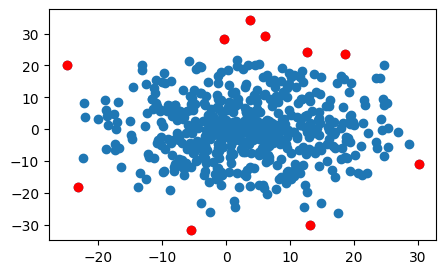

--------------------


In [20]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    global_min, _ = func3(x_train)

    nbrs = NearestNeighbors(n_neighbors=global_min[1], algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - global_min[2])
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    plt.figure(figsize=(5, 3))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()
    
    print("-"*20)